In [20]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/Admin.DESKTOP-Q9CVR13/Desktop/DataSet imarticus/PYTHON/Day 3/data_clean.csv", index_col= 0) #inde_col 1st colum ko index bana diya
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S


In [3]:
data.shape

(158, 9)

In [4]:
data.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [5]:
data['Month'] = pd.to_numeric(data['Month'],errors = 'coerce') #force to replace any other non numeric values with na
data['Temp C'] = pd.to_numeric(data['Temp C'],errors = 'coerce')
data['Weather'] = data['Weather'].astype('category')

In [6]:
data.dtypes

Ozone       float64
Solar.R     float64
Wind        float64
Temp C      float64
Month       float64
Day           int64
Year          int64
Temp          int64
Weather    category
dtype: object

## droping Dubliacted

In [7]:
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
157,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [8]:
data_drop = data.drop_duplicates()

In [9]:
data_drop.shape

(157, 9)

## Droping Columns

In [10]:
data_drop2 = data_drop.drop('Temp C', axis = 1) # droping colum of Temp C # axis = 1 is for colum
# axis = 0 for raw
data_drop2

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30,2010,68,S
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S


## Rename the Columns

In [11]:
solar_rename  =  data_drop2.rename({'Solar.R' : 'Solar'}, axis = 1)

solar_rename

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30,2010,68,S
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S


In [12]:
solar_rename.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [13]:
solar_rename.shape

(157, 8)

In [14]:
data_after_na =  solar_rename.dropna()
data_after_na.shape

(111, 8)

No handles with labels found to put in legend.


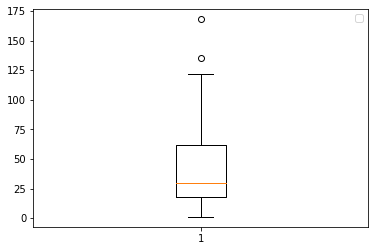

In [15]:
data_ozon = data_after_na.Ozone
plt.boxplot(data_ozon)
plt.legend()

No handles with labels found to put in legend.


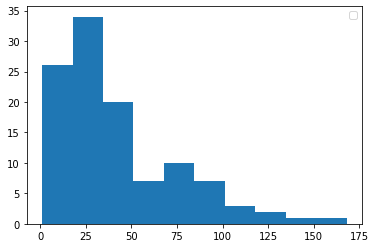

In [16]:
plt.hist(data_ozon)
plt.legend()

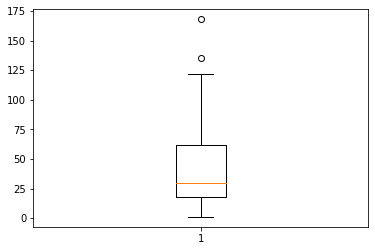

In [17]:
box = plt.boxplot(data_ozon)

In [18]:
[temp.get_ydata() for temp in box['fliers']] 
# showing outlier number which are outlier
#temp is variable
#fliers -  point represent data tht extended beyond the whiskers 

[array([135., 168.])]

In [19]:
[temp.get_ydata()[1] for temp in box['whiskers']] # showing outlier whiskers  value 


[1.0, 122.0]

<AxesSubplot:>

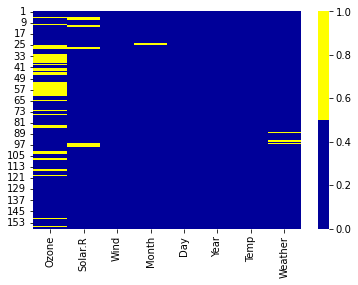

In [28]:
cols = data_drop2.columns
colours = ['#000099','#ffff00']
sns.heatmap(data_drop2[cols].isnull(),cmap=sns.color_palette(colours)) # specify the colours - yellow is missing blue is not missing 

In [25]:
data_drop2.isnull().sum()

Ozone      38
Solar.R     7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [27]:
mean_oz = data_drop2['Ozone'].mean()
mean_oz

41.81512605042017

In [29]:
data_drop2['Ozone'] = data_drop2['Ozone'].fillna(mean_oz) # replaced with mean

In [30]:
data_drop2.isnull().sum()

Ozone      0
Solar.R    7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [35]:
mode_wt = data_drop2['Weather'].mode().iloc[0] #iloc bcz data type is seriers thts why need to deal with series 
mode_wt # showing mode


'S'

In [36]:
data_drop2['Weather'] = data_drop2['Weather'].fillna(mode_wt) # replaced with mode

In [37]:
data_drop2.isnull().sum()

Ozone      0
Solar.R    7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [40]:
data_drop2

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.000000,190.0,7.4,5.0,1,2010,67,S
2,36.000000,118.0,8.0,5.0,2,2010,72,C
3,12.000000,149.0,12.6,5.0,3,2010,74,PS
4,18.000000,313.0,11.5,5.0,4,2010,62,S
5,41.815126,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.000000,223.0,11.5,9.0,30,2010,68,S
154,41.000000,190.0,7.4,5.0,1,2010,67,C
155,30.000000,193.0,6.9,9.0,26,2010,70,PS
156,41.815126,145.0,13.2,9.0,27,2010,77,S


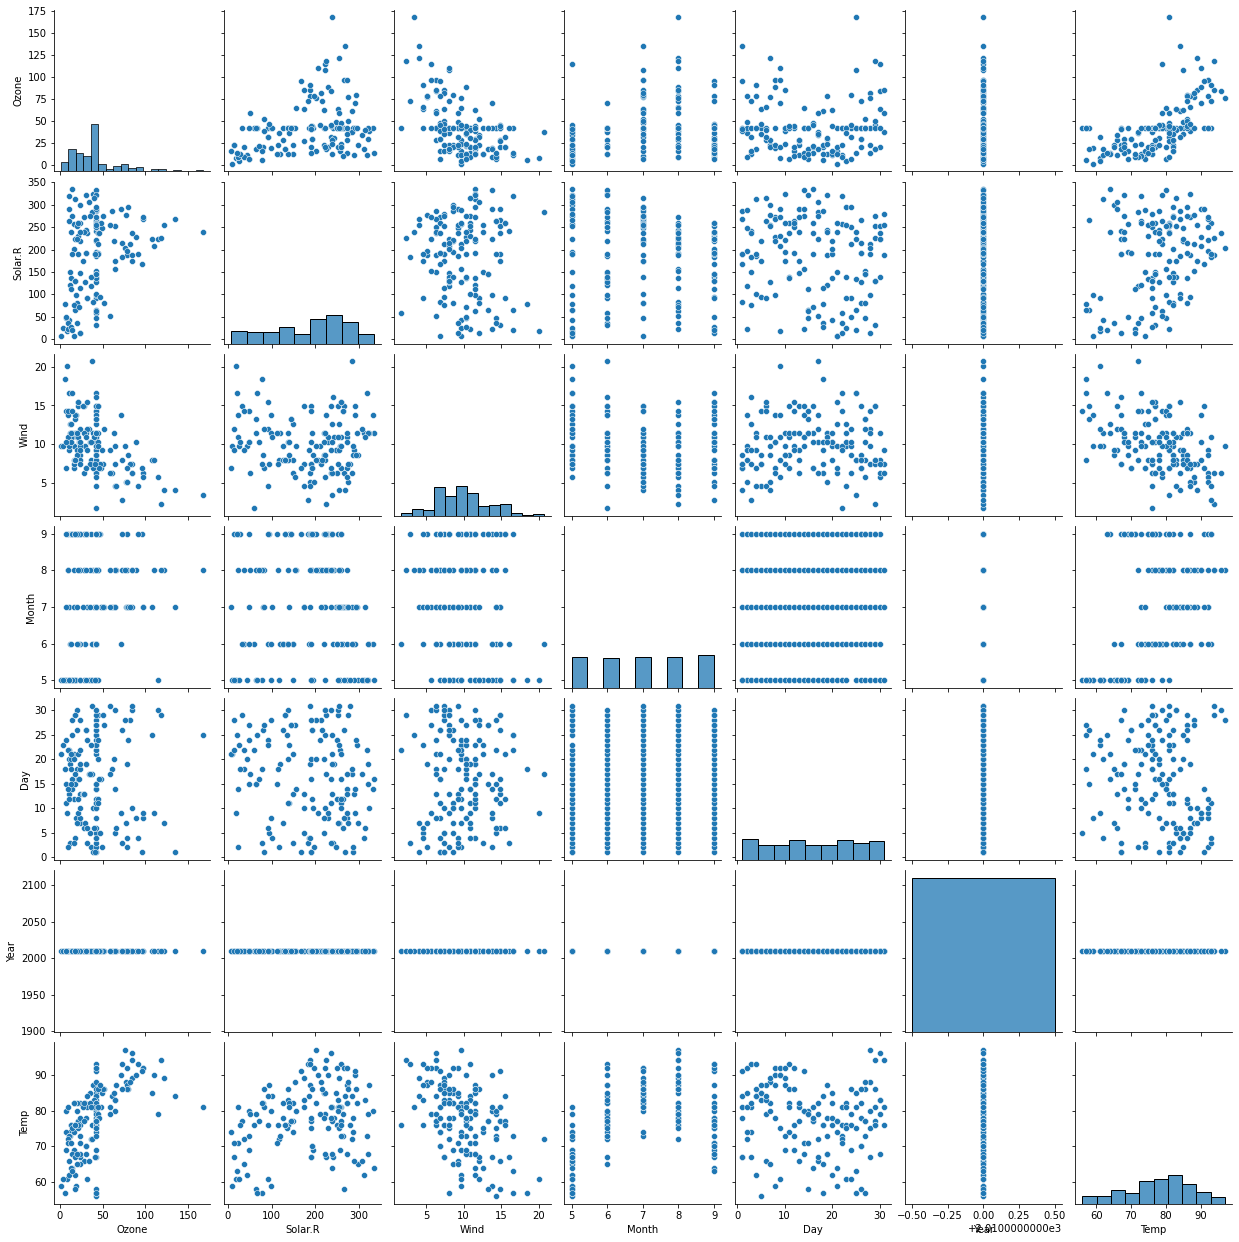

In [38]:
sns.pairplot(data_drop2)

In [39]:
data_drop2.corr()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.308687,-0.520004,0.132860,-0.021916,NaN,0.606500
Solar.R,0.308687,1.000000,-0.057407,-0.094012,-0.155663,NaN,0.273558
Wind,-0.520004,-0.057407,1.000000,-0.166216,0.029900,NaN,-0.441228
Month,0.132860,-0.094012,-0.166216,1.000000,0.050055,NaN,0.398516
Day,-0.021916,-0.155663,0.029900,0.050055,1.000000,NaN,-0.122787
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.606500,0.273558,-0.441228,0.398516,-0.122787,NaN,1.000000


## Transformation